<a href="https://colab.research.google.com/github/TSFelg/dl-cohort/blob/main/unit1/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 1: Deep Learning Fundamentals

The goal of this unit's assignment is to make sure you have your working environment setup and ready to go for the rest of the course. We will be using [Google Colab](https://colab.research.google.com/notebook) for all the assignments. Google Colab is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. It is a great tool for learning and experimenting with deep learning.

If you followed the instructions on this unit's README file, you should likely be reading this on a Google Colab notebook. If not, please go back and follow the instructions there. If you are indeed running this on Google Colab, please proceed to read the rest of this notebook and run the code cells below.

In this unit, you won't be doing any coding (except if you really want to, in which case we encourage you to play around with this notebook). Instead, you should simply run the code in the cells below and make sure everything is working as expected.

The code is very simple and should run without any issues. It was adapted from [Unit 3 of the Deep Learning Fundamentals course on Lightning AI](https://github.com/Lightning-AI/dl-fundamentals/blob/main/unit03-pytorch-training/3.6-logreg-in-pytorch/logreg-part3.ipynb). A few comments were added to give context to those who may have skipped the video lessons.

## 1) Loading the Dataset

The dataset contains 20 observations, each of which has two features, $x_1$ and $x_2$, and a binary label $y$.

Below we load the dataset and print some of its properties.

In [1]:
import pandas as pd

In [2]:
data = [
    [0.77, -1.14, 0],
    [-0.33, 1.44, 0],
    [0.91, -3.07, 0],
    [-0.37, -1.91, 0],
    [-0.63, -1.53, 0],
    [0.39, -1.99, 0],
    [-0.49, -2.74, 0],
    [-0.68, -1.52, 0],
    [-0.10, -3.43, 0],
    [-0.05, -1.95, 0],
    [3.88, 0.65, 1],
    [0.73, 2.97, 1],
    [0.83, 3.94, 1],
    [1.59, 1.25, 1],
    [1.14, 3.91, 1],
    [1.73, 2.80, 1],
    [1.31, 1.85, 1],
    [1.56, 3.85, 1],
    [1.23, 2.54, 1],
    [1.33, 2.03, 1]
]

columns = ['x1', 'x2', 'label']

df = pd.DataFrame(data, columns=columns)

In [3]:
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [4]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [5]:
X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [6]:
X_train.shape

(20, 2)

In [7]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
y_train.shape

(20,)

In [9]:
import numpy as np

np.bincount(y_train)

array([10, 10])

## 2) Visualizing the dataset

We can visualize the dataset by plotting the two features ($x_1$ and $x_2$) in a scatter plot. We can also color each point according to its label ($y$).

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

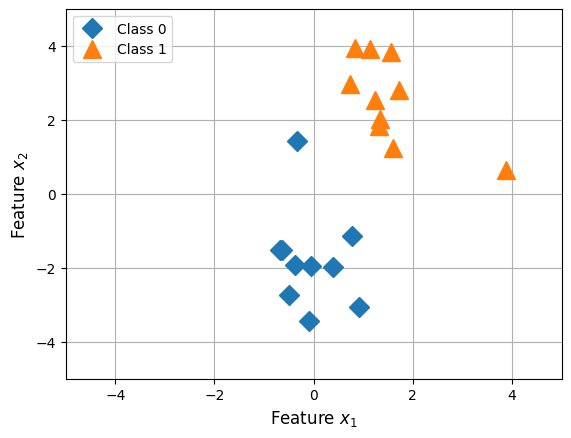

In [11]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

We normalize the data, to guarantee that features are centered around zero. This is a common practice in deep learning, as it helps models converge faster.

In [12]:
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

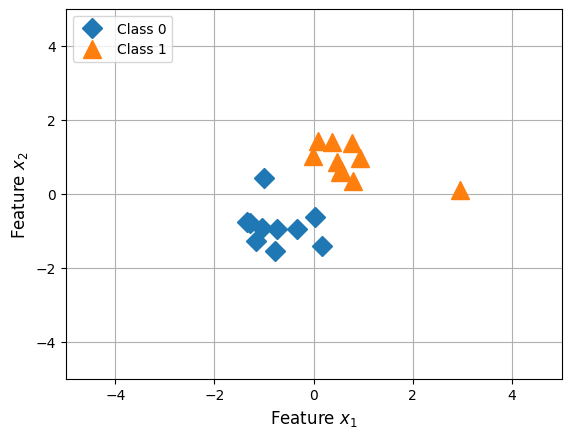

In [13]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

## 3) Implementing the model

The model is a simple logistic regression model. It takes two inputs ($x_1$ and $x_2$) and outputs a single value between 0 and 1, which we interpret as the probability of the input belonging to class 1.

Below we define the model and print a simple evaluation of the model's forward pass.

In [14]:
import torch

class LogisticRegression(torch.nn.Module):

    def __init__(self, num_features):
        super().__init__()
        self.linear = torch.nn.Linear(num_features, 1)

    def forward(self, x):
        logits = self.linear(x)
        probas = torch.sigmoid(logits)
        return probas

In [15]:
torch.manual_seed(1)

model = LogisticRegression(num_features=2)

In [16]:
x = torch.tensor([1.1, 2.1])

with torch.no_grad():
    proba = model(x)

print(proba)

tensor([0.4033])


## 4) Defining a DataLoader

We define a PyTorch DataLoader to help us iterate over the dataset during training.

In [17]:
from torch.utils.data import Dataset, DataLoader


class MyDataset(Dataset):
    def __init__(self, X, y):

        self.features = torch.tensor(X, dtype=torch.float32)
        self.labels = torch.tensor(y, dtype=torch.float32)

    def __getitem__(self, index):
        x = self.features[index]
        y = self.labels[index]
        return x, y

    def __len__(self):
        return self.labels.shape[0]


train_ds = MyDataset(X_train, y_train)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=10,
    shuffle=True,
)

In [18]:
X_train.shape

(20, 2)

## 5) The training loop

We define a simple training loop that iterates over the dataset and updates the model's parameters using gradient descent. Binary cross-entropy is used as the loss function.

In [19]:
import torch.nn.functional as F


torch.manual_seed(1)
model = LogisticRegression(num_features=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

num_epochs = 20

for epoch in range(num_epochs):

    model = model.train()
    for batch_idx, (features, class_labels) in enumerate(train_loader):

        probas = model(features)

        loss = F.binary_cross_entropy(probas, class_labels.view(probas.shape))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        ### LOGGING
        print(f'Epoch: {epoch+1:03d}/{num_epochs:03d}'
               f' | Batch {batch_idx:03d}/{len(train_loader):03d}'
               f' | Loss: {loss:.2f}')


Epoch: 001/020 | Batch 000/002 | Loss: 0.67
Epoch: 001/020 | Batch 001/002 | Loss: 0.73
Epoch: 002/020 | Batch 000/002 | Loss: 0.67
Epoch: 002/020 | Batch 001/002 | Loss: 0.67
Epoch: 003/020 | Batch 000/002 | Loss: 0.60
Epoch: 003/020 | Batch 001/002 | Loss: 0.68
Epoch: 004/020 | Batch 000/002 | Loss: 0.69
Epoch: 004/020 | Batch 001/002 | Loss: 0.54
Epoch: 005/020 | Batch 000/002 | Loss: 0.61
Epoch: 005/020 | Batch 001/002 | Loss: 0.57
Epoch: 006/020 | Batch 000/002 | Loss: 0.59
Epoch: 006/020 | Batch 001/002 | Loss: 0.54
Epoch: 007/020 | Batch 000/002 | Loss: 0.51
Epoch: 007/020 | Batch 001/002 | Loss: 0.58
Epoch: 008/020 | Batch 000/002 | Loss: 0.51
Epoch: 008/020 | Batch 001/002 | Loss: 0.54
Epoch: 009/020 | Batch 000/002 | Loss: 0.51
Epoch: 009/020 | Batch 001/002 | Loss: 0.49
Epoch: 010/020 | Batch 000/002 | Loss: 0.53
Epoch: 010/020 | Batch 001/002 | Loss: 0.44
Epoch: 011/020 | Batch 000/002 | Loss: 0.42
Epoch: 011/020 | Batch 001/002 | Loss: 0.52
Epoch: 012/020 | Batch 000/002 |

## 6) Evaluating the results

We evaluate the model by computing its accuracy on the dataset.

In [20]:
probas

tensor([[0.6687],
        [0.6810],
        [0.2162],
        [0.7398],
        [0.2126],
        [0.5744],
        [0.3209],
        [0.6503],
        [0.4276],
        [0.2598]], grad_fn=<SigmoidBackward0>)

In [21]:
pred = torch.where(probas > 0.5, 1, 0)
pred

tensor([[1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0]])

In [22]:
class_labels.view(pred.shape).to(pred.dtype)

tensor([[1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0]])

In [23]:
def compute_accuracy(model, dataloader):

    model = model.eval()

    correct = 0.0
    total_examples = 0

    for idx, (features, class_labels) in enumerate(dataloader):

        with torch.no_grad():
            probas = model(features)

        pred = torch.where(probas > 0.5, 1, 0)
        lab = class_labels.view(pred.shape).to(pred.dtype)

        compare = lab == pred
        correct += torch.sum(compare)
        total_examples += len(compare)

    return correct / total_examples

In [24]:
train_acc = compute_accuracy(model, train_loader)

In [25]:
print(f"Accuracy: {train_acc*100}%")

Accuracy: 100.0%


## 7) Optional: visualizing the decision boundary

We can also visualize the decision boundary of the model.

In [26]:
def plot_boundary(model):

    w1 = model.linear.weight[0][0].detach()
    w2 = model.linear.weight[0][1].detach()
    b = model.linear.bias[0].detach()

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

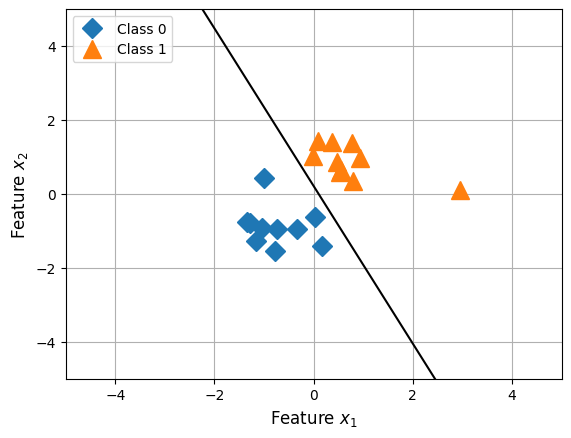

In [27]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(model)


plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

## 8) Optional: exploring the model performance

As we said before, you don't have to do any coding in this unit. But if you really want to, here is something you can try: play around with the model's hyperparameters (learning rate, number of epochs, etc.) and see how they affect its performance. In particular, what happens when you try a 10x or 100x smaller learning rate?